In [1]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import  TfidfVectorizer, TfidfTransformer, CountVectorizer

In [1]:
import os
import pickle
os.chdir('../')
from Carga_dataset import df
from Funciones.funciones import texto_limpio, texto_raiz 
# from main import *

In [3]:
df.head()

,descripcion,label,Rubro1_Artículos de electrónica,Rubro1_Artículos de fabricación y producción,Rubro1_Artículos eléctricos y de iluminación,"Rubro1_Artículos para estructuras, obras y construcciones",Rubro1_Artículos para plantas y animales,"Rubro1_Combustibles, lubricantes y anticorrosivos",Rubro1_Consultoria,"Rubro1_Educación, formación, entrenamiento y capacitación",...,Rubro1_Servicios de limpieza industrial,"Rubro1_Servicios de perforación de minería, petróleo y gas",Rubro1_Servicios de producción y fabricación industrial,"Rubro1_Servicios de transporte, almacenaje y correo","Rubro1_Servicios editoriales, de diseño, publicidad, gráficos y artistas","Rubro1_Servicios financieros, pensiones y seguros",Rubro1_Servicios medioambientales,"Rubro1_Servicios profesionales, administrativos y consultorías de gestión empresarial","Rubro1_Tecnologías de la información, telecomunicaciones y radiodifusión",Rubro1_Vehículos y equipamiento en general
id_producto,,,,,,,,,,,,,,,,,,,,,
2792-88-LE21-1,CÁMARA RETINAL NO MIDRIÁTICA - ESPECIFICACIONE...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1704-52-LP21-1,SERVICIO DE MUDANZA DE ENSERES PROPIOS Y EN US...,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1003-20-L121-1,LEÑA SECA CERTIFICADA,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4236-21-L121-1,MARCADOR BLANCO PARA METALES,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4236-21-L121-2,PLOMADA,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df['Descripcion limpia']= df['descripcion'].astype(str)
df['Descripcion limpia'] = df['Descripcion limpia'].apply(lambda texto: texto_limpio(texto)) #Aplicamos la función texto_limpio para limpiar las descripciones
df['descripcion']= df['descripcion'].astype(str)
df['Descripcion raiz limpia']= df['descripcion'].apply(lambda texto: texto_raiz(texto)) #Aplicamos la función texto_raiz que nos convierte las palabras en sus raíces
df.drop(columns=['descripcion','Descripcion limpia'], axis=1, inplace=True)

In [5]:
# ahora vectorizamos 
descripcion = np.array(df['Descripcion raiz limpia']) # array para armar el bag of words
np.set_printoptions(precision=2)


# forma corta TFIDF vectorizer
vectorizador = TfidfVectorizer()
matriz_palabras = vectorizador.fit_transform(descripcion)
matriz_palabras = matriz_palabras.astype('float32') # cambiamos el tipo a float32 para disminuir uso de memoria
matriz_palabras

<51646x19535 sparse matrix of type '<class 'numpy.float32'>'
	with 328577 stored elements in Compressed Sparse Row format>

In [6]:
palabras = vectorizador.vocabulary_

In [7]:
vectorizador.get_feature_names_out()

array(['aac', 'aacc', 'aaguj', ..., 'ñiqu', 'ñubl', 'ñuño'], dtype=object)

In [8]:
df2 = pd.DataFrame(matriz_palabras.toarray())
df2.head()

,0,1,2,3,4,5,6,7,8,9,...,19525,19526,19527,19528,19529,19530,19531,19532,19533,19534
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
df2.columns = vectorizador.get_feature_names_out()
df2.head()

,aac,aacc,aaguj,aalt,aasht,aatic,aavv,abacav,abadiaisbn,abaj,...,zurd,zurn,zuñig,zymar,ñielol,ñilhu,ñip,ñiqu,ñubl,ñuño
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 1000 componentes

In [17]:
pca_1000 = PCA(n_components=1000)
pca_1000 = pca_1000.fit(df2)
print(pca_1000.components_.round(3))

[[-0. -0.  0. ... -0. -0. -0.]
 [-0. -0. -0. ...  0.  0. -0.]
 [-0. -0. -0. ... -0. -0. -0.]
 ...
 [ 0. -0.  0. ... -0.  0. -0.]
 [ 0. -0. -0. ... -0.  0. -0.]
 [ 0. -0. -0. ... -0. -0. -0.]]


In [ ]:
#### para no tener que volver a ejecutar el PCA cargamos el dataframe desde archivo pickle
os.chdir('Datos')
fh=open('df_PCA1k.pkl','rb')  
pca_1000=pickle.load(fh)
fh.close()

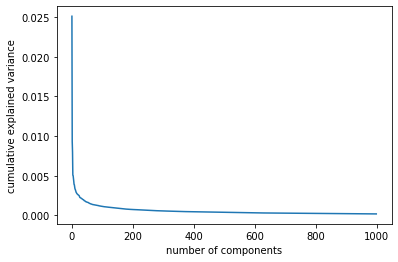

array([0.03, 0.03, 0.04, 0.05, 0.05, 0.06, 0.06, 0.07, 0.07, 0.07, 0.08,
       0.08, 0.08, 0.09, 0.09, 0.09, 0.09, 0.1 , 0.1 , 0.1 , 0.1 , 0.11,
       0.11, 0.11, 0.11, 0.12, 0.12, 0.12, 0.12, 0.13, 0.13, 0.13, 0.13,
       0.13, 0.14, 0.14, 0.14, 0.14, 0.14, 0.15, 0.15, 0.15, 0.15, 0.15,
       0.16, 0.16, 0.16, 0.16, 0.16, 0.16, 0.17, 0.17, 0.17, 0.17, 0.17,
       0.17, 0.18, 0.18, 0.18, 0.18, 0.18, 0.18, 0.18, 0.19, 0.19, 0.19,
       0.19, 0.19, 0.19, 0.19, 0.2 , 0.2 , 0.2 , 0.2 , 0.2 , 0.2 , 0.2 ,
       0.21, 0.21, 0.21, 0.21, 0.21, 0.21, 0.21, 0.21, 0.22, 0.22, 0.22,
       0.22, 0.22, 0.22, 0.22, 0.22, 0.22, 0.23, 0.23, 0.23, 0.23, 0.23,
       0.23, 0.23, 0.23, 0.24, 0.24, 0.24, 0.24, 0.24, 0.24, 0.24, 0.24,
       0.24, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25,
       0.26, 0.26, 0.26, 0.26, 0.26, 0.26, 0.26, 0.26, 0.26, 0.26, 0.27,
       0.27, 0.27, 0.27, 0.27, 0.27, 0.27, 0.27, 0.27, 0.27, 0.28, 0.28,
       0.28, 0.28, 0.28, 0.28, 0.28, 0.28, 0.28, 0.

In [18]:
plt.plot(pca_1000.explained_variance_ratio_)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()
np.cumsum(pca_1000.explained_variance_ratio_)

In [19]:
pca_1000.components_.shape

(1000, 19535)

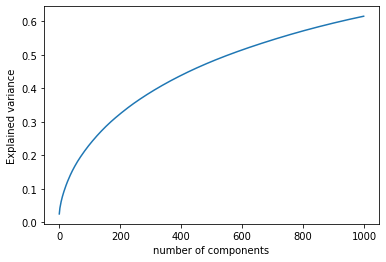

In [20]:
plt.plot(np.cumsum(pca_1000.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('Explained variance')
plt.show()

## 2000 componentes

In [ ]:
pca_2000 = PCA(n_components=2000)
pca_2000 = pca_2000.fit(df2)
print(pca_2000.components_.round(3))

In [ ]:
#### para no tener que volver a ejecutar el PCA cargamos el dataframe desde archivo pickle
os.chdir('Datos')
fh=open('df_PCA2k.pkl','rb')  
pca_2000=pickle.load(fh)
fh.close()

[[-0.   -0.    0.   ... -0.   -0.   -0.  ]
 [-0.   -0.   -0.   ...  0.    0.   -0.  ]
 [-0.   -0.   -0.   ... -0.   -0.   -0.  ]
 ...
 [ 0.    0.   -0.   ... -0.    0.01 -0.  ]
 [ 0.    0.    0.   ...  0.   -0.01 -0.  ]
 [ 0.    0.   -0.   ...  0.   -0.06  0.  ]]


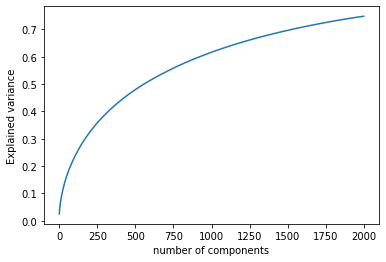

In [21]:
plt.plot(np.cumsum(pca_2000.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('Explained variance')
plt.show()
print('ratio explic. varianza acumulada: ',np.cumsum(pca_2000.explained_variance_ratio_).max())

In [23]:
pca_2000.components_.round(3).shape

(2000, 19535)

## 5000 componentes

In [ ]:
pca_5000 = PCA(n_components=5000)
pca_5000 = pca_5000.fit(df2)
print(pca_5000.components_.round(3))

In [ ]:
#### para no tener que volver a ejecutar el PCA cargamos el dataframe desde archivo pickle
os.chdir('Datos')
fh=open('df_PCA5k.pkl','rb')  
pca_5000=pickle.load(fh)
fh.close()

[[-0.   -0.    0.   ... -0.   -0.   -0.  ]
 [-0.   -0.   -0.   ...  0.    0.   -0.  ]
 [-0.   -0.   -0.   ... -0.   -0.   -0.  ]
 ...
 [ 0.   -0.   -0.   ... -0.01  0.    0.01]
 [-0.    0.    0.   ... -0.    0.    0.  ]
 [-0.    0.   -0.   ... -0.   -0.   -0.  ]]


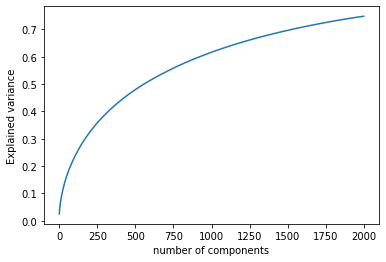

In [24]:

plt.plot(np.cumsum(pca_5000.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('Explained variance')
plt.show()
print('ratio explic. varianza acumulada: ',np.cumsum(pca_5000.explained_variance_ratio_).max())

In [26]:
len(pca_5000.components_)

2000

## 10 mil componentes

In [ ]:
pca_10k = PCA(n_components=10000)
pca_10k = pca_10k.fit(df2)
print(pca_10k.components_.round(3))

In [ ]:
#### para no tener que volver a ejecutar el PCA cargamos el dataframe desde archivo pickle
os.chdir('Datos')
fh=open('df_PCA10k.pkl','rb')  
pca_10k=pickle.load(fh)
fh.close()

[[-0.   -0.    0.   ... -0.   -0.   -0.  ]
 [-0.   -0.   -0.   ...  0.    0.   -0.  ]
 [-0.   -0.   -0.   ... -0.   -0.   -0.  ]
 ...
 [-0.01 -0.    0.01 ... -0.   -0.    0.01]
 [-0.   -0.    0.02 ... -0.    0.    0.  ]
 [-0.   -0.   -0.03 ... -0.01  0.   -0.  ]]


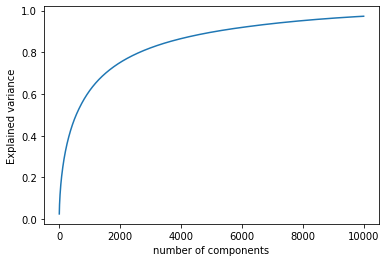

In [10]:

plt.plot(np.cumsum(pca_10k.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('Explained variance')
plt.show()
print('ratio explic. varianza acumulada: ',np.cumsum(pca_10k.explained_variance_ratio_).max())

## Creamos el dataframe de los componentes seleccionados y unimos con dataframe de variables categoricas junto con label

In [12]:
lista_PCA = [ 'PC'+str(i) for i in range(len(pca_10k.components_)) ]
lista_PCA

['PC0',
 'PC1',
 'PC2',
 'PC3',
 'PC4',
 'PC5',
 'PC6',
 'PC7',
 'PC8',
 'PC9',
 'PC10',
 'PC11',
 'PC12',
 'PC13',
 'PC14',
 'PC15',
 'PC16',
 'PC17',
 'PC18',
 'PC19',
 'PC20',
 'PC21',
 'PC22',
 'PC23',
 'PC24',
 'PC25',
 'PC26',
 'PC27',
 'PC28',
 'PC29',
 'PC30',
 'PC31',
 'PC32',
 'PC33',
 'PC34',
 'PC35',
 'PC36',
 'PC37',
 'PC38',
 'PC39',
 'PC40',
 'PC41',
 'PC42',
 'PC43',
 'PC44',
 'PC45',
 'PC46',
 'PC47',
 'PC48',
 'PC49',
 'PC50',
 'PC51',
 'PC52',
 'PC53',
 'PC54',
 'PC55',
 'PC56',
 'PC57',
 'PC58',
 'PC59',
 'PC60',
 'PC61',
 'PC62',
 'PC63',
 'PC64',
 'PC65',
 'PC66',
 'PC67',
 'PC68',
 'PC69',
 'PC70',
 'PC71',
 'PC72',
 'PC73',
 'PC74',
 'PC75',
 'PC76',
 'PC77',
 'PC78',
 'PC79',
 'PC80',
 'PC81',
 'PC82',
 'PC83',
 'PC84',
 'PC85',
 'PC86',
 'PC87',
 'PC88',
 'PC89',
 'PC90',
 'PC91',
 'PC92',
 'PC93',
 'PC94',
 'PC95',
 'PC96',
 'PC97',
 'PC98',
 'PC99',
 'PC100',
 'PC101',
 'PC102',
 'PC103',
 'PC104',
 'PC105',
 'PC106',
 'PC107',
 'PC108',
 'PC109',
 'PC110',


In [13]:
reduced_data = pca_10k.transform(df2)
reduced_data = pd.DataFrame(reduced_data, columns = lista_PCA)
reduced_data.head()

,PC0,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,...,PC9990,PC9991,PC9992,PC9993,PC9994,PC9995,PC9996,PC9997,PC9998,PC9999
0,-0.052001,0.188226,0.128652,0.007580,0.001261,0.009056,0.005666,-0.010228,-0.011292,0.017647,...,0.000559,-0.006728,-0.008862,0.005603,0.003734,-0.004459,0.006979,0.006532,0.001144,-0.009460
1,-0.046742,0.099255,0.044263,-0.006276,-0.001771,-0.010653,-0.011447,-0.010258,-0.003430,-0.059638,...,0.006290,0.001019,0.000402,-0.001083,0.002779,0.001817,-0.000617,-0.000709,-0.000879,-0.000612
2,0.047980,0.001655,-0.040406,-0.017478,0.019268,-0.008635,-0.002686,-0.004714,-0.005276,-0.021078,...,0.000778,-0.000033,-0.001052,0.001916,-0.001158,-0.001550,0.001334,-0.002708,-0.001893,0.000894
3,-0.040198,-0.004732,-0.058158,-0.017319,-0.002154,-0.062115,-0.003820,0.016351,-0.042183,0.059893,...,-0.000210,0.000125,-0.001168,0.000269,0.000189,0.000342,0.000191,0.000656,0.000733,-0.000577
4,-0.034056,-0.008284,-0.037599,-0.006149,-0.002172,-0.011587,-0.007511,-0.005855,-0.006275,-0.018405,...,0.000608,0.000374,0.000580,0.001015,-0.000376,-0.000462,0.001559,0.000437,0.000919,-0.000816


In [14]:
temp = df.reset_index()
temp.head()

,id_producto,label,Rubro1_Artículos de electrónica,Rubro1_Artículos de fabricación y producción,Rubro1_Artículos eléctricos y de iluminación,"Rubro1_Artículos para estructuras, obras y construcciones",Rubro1_Artículos para plantas y animales,"Rubro1_Combustibles, lubricantes y anticorrosivos",Rubro1_Consultoria,"Rubro1_Educación, formación, entrenamiento y capacitación",...,"Rubro1_Servicios de perforación de minería, petróleo y gas",Rubro1_Servicios de producción y fabricación industrial,"Rubro1_Servicios de transporte, almacenaje y correo","Rubro1_Servicios editoriales, de diseño, publicidad, gráficos y artistas","Rubro1_Servicios financieros, pensiones y seguros",Rubro1_Servicios medioambientales,"Rubro1_Servicios profesionales, administrativos y consultorías de gestión empresarial","Rubro1_Tecnologías de la información, telecomunicaciones y radiodifusión",Rubro1_Vehículos y equipamiento en general,Descripcion raiz limpia
0,2792-88-LE21-1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,cam retinal midriat especif bas tecnic
1,1704-52-LP21-1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,servici mudanz enser propi hospital martin qui...
2,1003-20-L121-1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,leñ sec certific
3,4236-21-L121-1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,marcador blanc metal
4,4236-21-L121-2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,plom


In [15]:
reduced_data.head()

,PC0,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,...,PC9990,PC9991,PC9992,PC9993,PC9994,PC9995,PC9996,PC9997,PC9998,PC9999
0,-0.052001,0.188226,0.128652,0.007580,0.001261,0.009056,0.005666,-0.010228,-0.011292,0.017647,...,0.000559,-0.006728,-0.008862,0.005603,0.003734,-0.004459,0.006979,0.006532,0.001144,-0.009460
1,-0.046742,0.099255,0.044263,-0.006276,-0.001771,-0.010653,-0.011447,-0.010258,-0.003430,-0.059638,...,0.006290,0.001019,0.000402,-0.001083,0.002779,0.001817,-0.000617,-0.000709,-0.000879,-0.000612
2,0.047980,0.001655,-0.040406,-0.017478,0.019268,-0.008635,-0.002686,-0.004714,-0.005276,-0.021078,...,0.000778,-0.000033,-0.001052,0.001916,-0.001158,-0.001550,0.001334,-0.002708,-0.001893,0.000894
3,-0.040198,-0.004732,-0.058158,-0.017319,-0.002154,-0.062115,-0.003820,0.016351,-0.042183,0.059893,...,-0.000210,0.000125,-0.001168,0.000269,0.000189,0.000342,0.000191,0.000656,0.000733,-0.000577
4,-0.034056,-0.008284,-0.037599,-0.006149,-0.002172,-0.011587,-0.007511,-0.005855,-0.006275,-0.018405,...,0.000608,0.000374,0.000580,0.001015,-0.000376,-0.000462,0.001559,0.000437,0.000919,-0.000816


In [16]:
temp = df.reset_index()
df3 = pd.concat([temp,reduced_data], axis=1)
df3.drop(['Descripcion raiz limpia'], axis=1, inplace=True)
df3.shape

(51646, 10057)

In [17]:
df3.head()

,id_producto,label,Rubro1_Artículos de electrónica,Rubro1_Artículos de fabricación y producción,Rubro1_Artículos eléctricos y de iluminación,"Rubro1_Artículos para estructuras, obras y construcciones",Rubro1_Artículos para plantas y animales,"Rubro1_Combustibles, lubricantes y anticorrosivos",Rubro1_Consultoria,"Rubro1_Educación, formación, entrenamiento y capacitación",...,PC9990,PC9991,PC9992,PC9993,PC9994,PC9995,PC9996,PC9997,PC9998,PC9999
0,2792-88-LE21-1,0,0,0,0,0,0,0,0,0,...,0.000559,-0.006728,-0.008862,0.005603,0.003734,-0.004459,0.006979,0.006532,0.001144,-0.009460
1,1704-52-LP21-1,0,0,0,0,0,0,0,0,0,...,0.006290,0.001019,0.000402,-0.001083,0.002779,0.001817,-0.000617,-0.000709,-0.000879,-0.000612
2,1003-20-L121-1,0,0,0,0,0,0,0,0,0,...,0.000778,-0.000033,-0.001052,0.001916,-0.001158,-0.001550,0.001334,-0.002708,-0.001893,0.000894
3,4236-21-L121-1,0,0,0,0,0,0,0,0,0,...,-0.000210,0.000125,-0.001168,0.000269,0.000189,0.000342,0.000191,0.000656,0.000733,-0.000577
4,4236-21-L121-2,0,0,0,0,0,0,0,0,0,...,0.000608,0.000374,0.000580,0.001015,-0.000376,-0.000462,0.001559,0.000437,0.000919,-0.000816
